In [1]:
import pandas as pd 
import numpy as np 


In [2]:

df=pd.read_csv('./default/UCI_Credit_Card_7879_9833.csv')
dfnew=df.copy()
dfnew

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
# there is no null value present in datasets 
df[df.isnull()].count()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
# we need to now clean the data sets 

# change the clean the data of education columns
# Education range from : (1 = graduate school; 2 = university; 3 = high school; 4 = others).
# so any inputs beyond 3 falls in other categorgy unlike giving input ay=t max 6

def clean_education(number):
    if number>=4:
        data=4
    else:
        data=number
    return data 


def rename_col(dataframe,old_name,new_name):
    dataframe.rename({old_name:new_name},axis=1,inplace=True)


# we are intreset who didnt pay the payments so if anyone pay must be replace by 0 and didnt pay will be number from 1 to 4
def pay_duly(number):
    if number<0:
        return 0
    else:
        return number

In [6]:
dfnew.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [7]:
dfnew['EDUCATION']=dfnew['EDUCATION'].apply(clean_education)
rename_col(dfnew,'PAY_0','PAY_1')
rename_col(dfnew,'default.payment.next.month','default')

for i in range(1,7):
    dfnew[f'PAY_{i}']=eval(f'dfnew.PAY_{i}.apply(pay_duly)')
    

In [8]:
#dropping id column as every customer data has its own unique id
dfnew.drop('ID',axis=1,inplace=True)

In [14]:
dfnew.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.840400,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.744097,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Importing required libraries

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # to select model for best categorisation
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression #since we have binary classification
from sklearn.svm import SVC
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<Axes: >

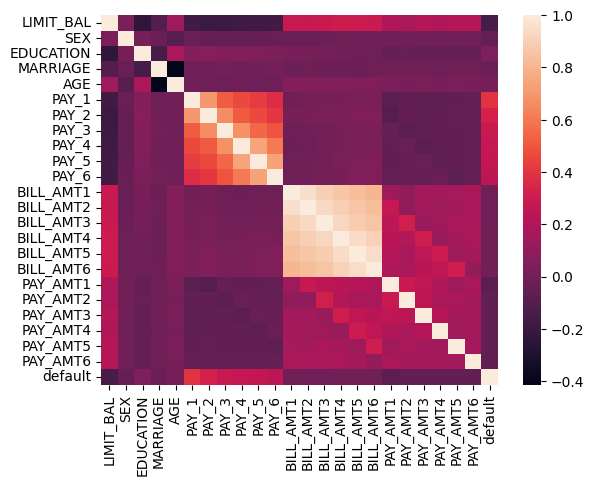

In [ ]:
sns.heatmap(dfnew.corr())
# we can see correlation among bill amount , pay schedule , pay amount 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 

In [ ]:
#finding mulicollinearity using vif

for i in range(1,len(dfnew.columns[1::])):

    print(f'{dfnew.columns[i]} and it {variance_inflation_factor(dfnew,i)}')

# below we can see bill amount,sex,age,marriage has very high collinearity and hence we have two option
# Either we drop the columns with high collinearity or make use of ensembling method like random forest
# also make use of regularisation as there are alot of columns 

SEX and it 9.126785420162424
EDUCATION and it 7.355873488373028
MARRIAGE and it 6.328372881969549
AGE and it 11.38118128226549
PAY_1 and it 2.601645953694166
PAY_2 and it 3.0383012515867516
PAY_3 and it 2.8913521590472375
PAY_4 and it 3.3124470435909545
PAY_5 and it 3.561703079746718
PAY_6 and it 2.5258969929599653
BILL_AMT1 and it 20.74572578082952
BILL_AMT2 and it 38.10470475319848
BILL_AMT3 and it 31.733334260801726
BILL_AMT4 and it 29.41692401539279
BILL_AMT5 and it 35.87636290848096
BILL_AMT6 and it 21.36484554178419
PAY_AMT1 and it 1.902308768298678
PAY_AMT2 and it 2.378059295407151
PAY_AMT3 and it 1.8952935207110009
PAY_AMT4 and it 1.791317007393301
PAY_AMT5 and it 1.8501347548605191
PAY_AMT6 and it 1.2702230788774882


In [ ]:
# lets first split datasets into X and Y

def X_data(df):
    return df.drop('default',axis=1)
def Y_data(df):
    return df[['default']]

X=X_data(dfnew)
Y=Y_data(dfnew)

In [ ]:
#scaling the datasets using standard scalar
sc=StandardScaler()  # save sc for transforming the user inputs
dfscaled=pd.DataFrame(sc.fit_transform(X),columns=X.columns)
X=dfscaled

In [ ]:
# lets divide datasets as per cluster 

kmeans=KMeans(n_clusters=10)
kmeans.fit(X,Y)


KMeans(n_clusters=10)

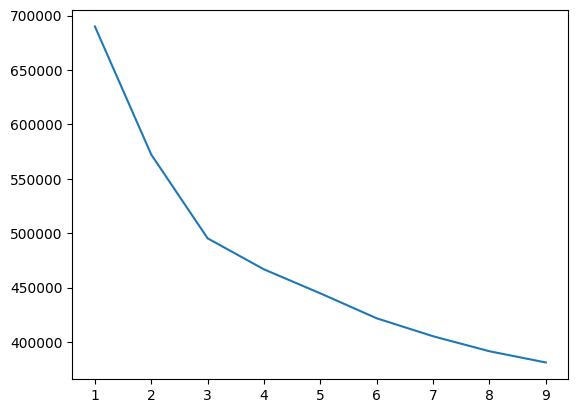

In [ ]:
def test_cluster(X,Y):
    list_interia=[]
    for i in range(1,10):
        kmeans=KMeans(n_clusters=i)
        kmeans.fit(X,Y)
        list_interia.append(kmeans.inertia_)
        
    sns.lineplot(x=range(1,10),y=list_interia)
    return list_interia

inertia_values=test_cluster(X,Y)


3

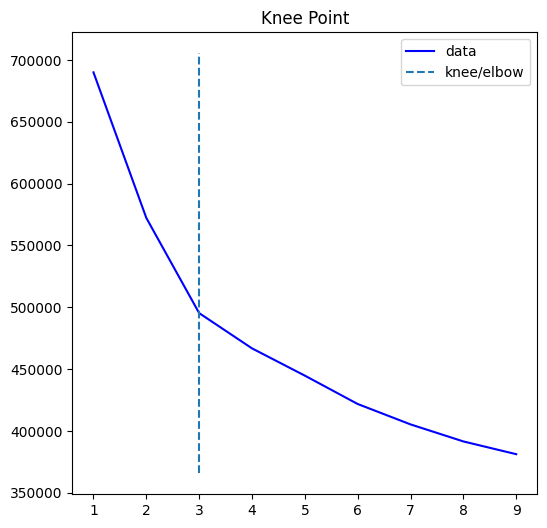

In [ ]:

# finding elblow line value using kneed
from kneed import KneeLocator
knee_value=KneeLocator(range(1,10),inertia_values,curve="convex",direction="decreasing")
knee_value.plot_knee()
elbow_value=knee_value.elbow # this will give us value to feed in kmeans
elbow_value

In [ ]:
# now we perform clustering of data sets and make individual datasets for cluster

km_model=KMeans(n_clusters=3)
km_trained_model=km_model.fit(X,Y)


In [ ]:
X.iloc[2].values.reshape(1,-1)

array([[-0.59720239,  0.81016074,  0.21449188,  0.85855728, -0.16115646,
        -0.46907093, -0.39918641, -0.38461417, -0.33999038, -0.30862144,
        -0.31668782, -0.29855966, -0.49389911, -0.48240819, -0.44973025,
        -0.41718767, -0.39162956, -0.25029158, -0.19188673, -0.24000461,
        -0.24422965, -0.24868274, -0.01212243]])

In [ ]:
# predicting the cluster number
f=km_trained_model.predict(X.iloc[1].values.reshape(1,-1))
f

array([1], dtype=int32)

In [ ]:
X['cluster']=km_trained_model.predict(X)
# adding datasets into cluster

In [ ]:
#predicting cluster output

In [ ]:
df_final=X

In [ ]:
df_final['default']=Y

In [ ]:
#df_final has final clustering value 
df_final

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,cluster,default
0,-1.136720,0.810161,0.214492,-1.057295,-1.246020,2.160496,2.095469,-0.384614,-0.33999,-0.308621,...,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1,1
1,-0.365981,0.810161,0.214492,0.858557,-1.029047,-0.469071,2.095469,-0.384614,-0.33999,-0.308621,...,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1,1
2,-0.597202,0.810161,0.214492,0.858557,-0.161156,-0.469071,-0.399186,-0.384614,-0.33999,-0.308621,...,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,1,0
3,-0.905498,0.810161,0.214492,-1.057295,0.164303,-0.469071,-0.399186,-0.384614,-0.33999,-0.308621,...,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,1,0
4,-0.905498,-1.234323,0.214492,-1.057295,2.334029,-0.469071,-0.399186,-0.384614,-0.33999,-0.308621,...,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,1.558426,-1.057295,0.381275,-0.469071,-0.399186,-0.384614,-0.33999,-0.308621,...,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,2,0
29996,-0.134759,-1.234323,1.558426,0.858557,0.815221,-0.469071,-0.399186,-0.384614,-0.33999,-0.308621,...,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,1,0
29997,-1.059646,-1.234323,0.214492,0.858557,0.164303,4.790063,3.342796,2.145187,-0.33999,-0.308621,...,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,0,1
29998,-0.674276,-1.234323,1.558426,-1.057295,0.598248,0.845713,-0.399186,-0.384614,-0.33999,-0.308621,...,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1,1


In [ ]:
import pickle
import os
import shutil

def cluster_select(df,model,parameter,cluster_number,model_name):
    score_list=[]
    for i in range(0,cluster_number):
        x=df[df.cluster==i].drop(df.columns[-1:-3:-1],axis=1)
        y=df[df.cluster==i].default

        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
        G_model=GridSearchCV(estimator=model(),param_grid=parameter,cv=2)
        G_model.fit(xtrain,ytrain)
        best_parameters=G_model.best_params_
        model_=model(**best_parameters)
        model_train=model_.fit(xtrain,ytrain)
        scoring=model_train.score(xtest,ytest)
        score_list.append(scoring)
        pickle.dump(model_train,file=open(f'{model_name}_cluster{i}.pkl','wb'))
        os.makedirs('Models',exist_ok=True)
        shutil.move(f'{model_name}_cluster{i}.pkl','Models')
        
        print( f'{best_parameters} for cluster {i} and score {scoring}')
    return score_list


    
    
    

In [ ]:

s1=cluster_select(X,LogisticRegression,{'penalty':['l1','l2','elasticnet'],'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']},3,'logisticR')

{'penalty': 'l1', 'solver': 'liblinear'} for cluster 0 and score 0.6553911205073996
{'penalty': 'l1', 'solver': 'liblinear'} for cluster 1 and score 0.8326583743129882
{'penalty': 'l2', 'solver': 'sag'} for cluster 2 and score 0.8676599474145487


In [ ]:
s2=cluster_select(X,RandomForestClassifier,{'criterion':['gini','entropy','log_loss'],'max_features':['sqrt','log2'],'max_depth':range(2,8)},3,'randomF')

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2'} for cluster 0 and score 0.6490486257928119
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'} for cluster 1 and score 0.8364188602834828
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2'} for cluster 2 and score 0.8615249780893953


In [ ]:
#from above we can observe for cluster 0 and 2 random forest is having high performace while logistic regression performing good for cluster 1 

select_model={
    0:'randomF_cluster0.pkl',
    1:'logisticR_cluster1.pkl',
    2:'randomF_cluster2.pkl',
}